<a href="https://colab.research.google.com/github/ML20220207/udemy_TF/blob/main/01_regression_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/01_neural_network_regression_in_tensorflow.ipynb

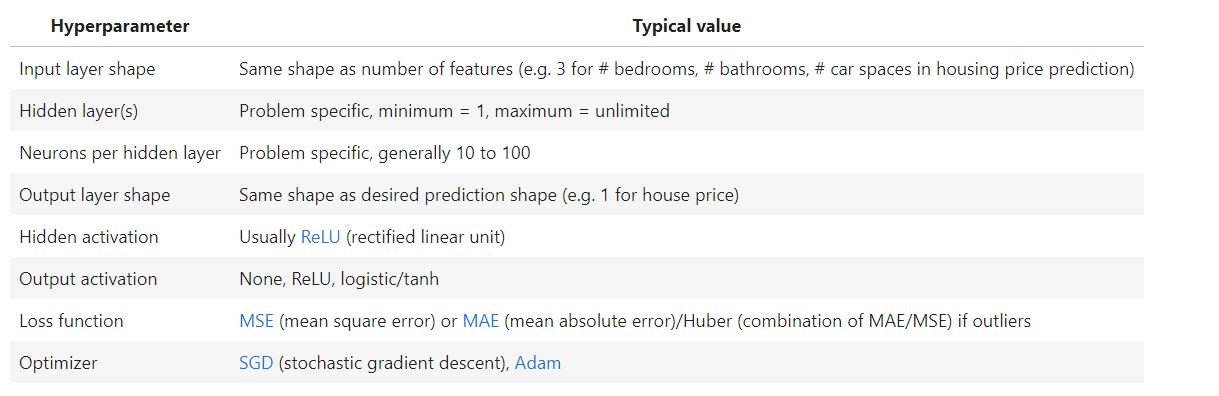

In [2]:
import tensorflow as tf
print(tf.__version__)

2.7.0


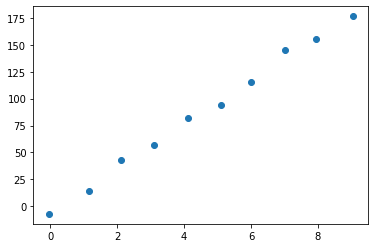

In [61]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array(range(0,10)) + np.random.normal(scale = 0.1, size = 10)
X

Y = np.array(range(0,200,20))+ np.random.normal(scale = 5,size = 10)
Y

plt.scatter(X,Y)

###Regression input shapes and output shapes


1.   input shape is the shape of your data that goes into the model.
2.   output shape is the shape of your data you want to come out of your model.



In [21]:
# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price, house_info.shape

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>,
 TensorShape([3]))

### Steps in modelling with TensorFlow


1.   Creating a model
2.   Compiling a model
3.   Fitting a model





In [ ]:
# Set random seed
tf.random.set_seed(42)

X = tf.constant(X)
Y = tf.constant(Y)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=10)

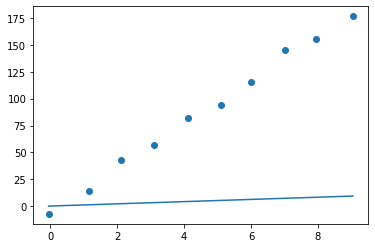

In [63]:
y_pred = model.predict(X)
fig,ax = plt.subplots()
ax.plot(X,y_pred)
ax.scatter(X,Y,label = 'star')
plt.show()

In [ ]:
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=500)
y_pred = model.predict(X)
fig,ax = plt.subplots()
ax.plot(X,y_pred)
ax.scatter(X,Y,label = 'star')
plt.show()


### Improving a model
Creating a model - here you might want to add more layers, increase the 

1.   Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

2.   Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.

3.   Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

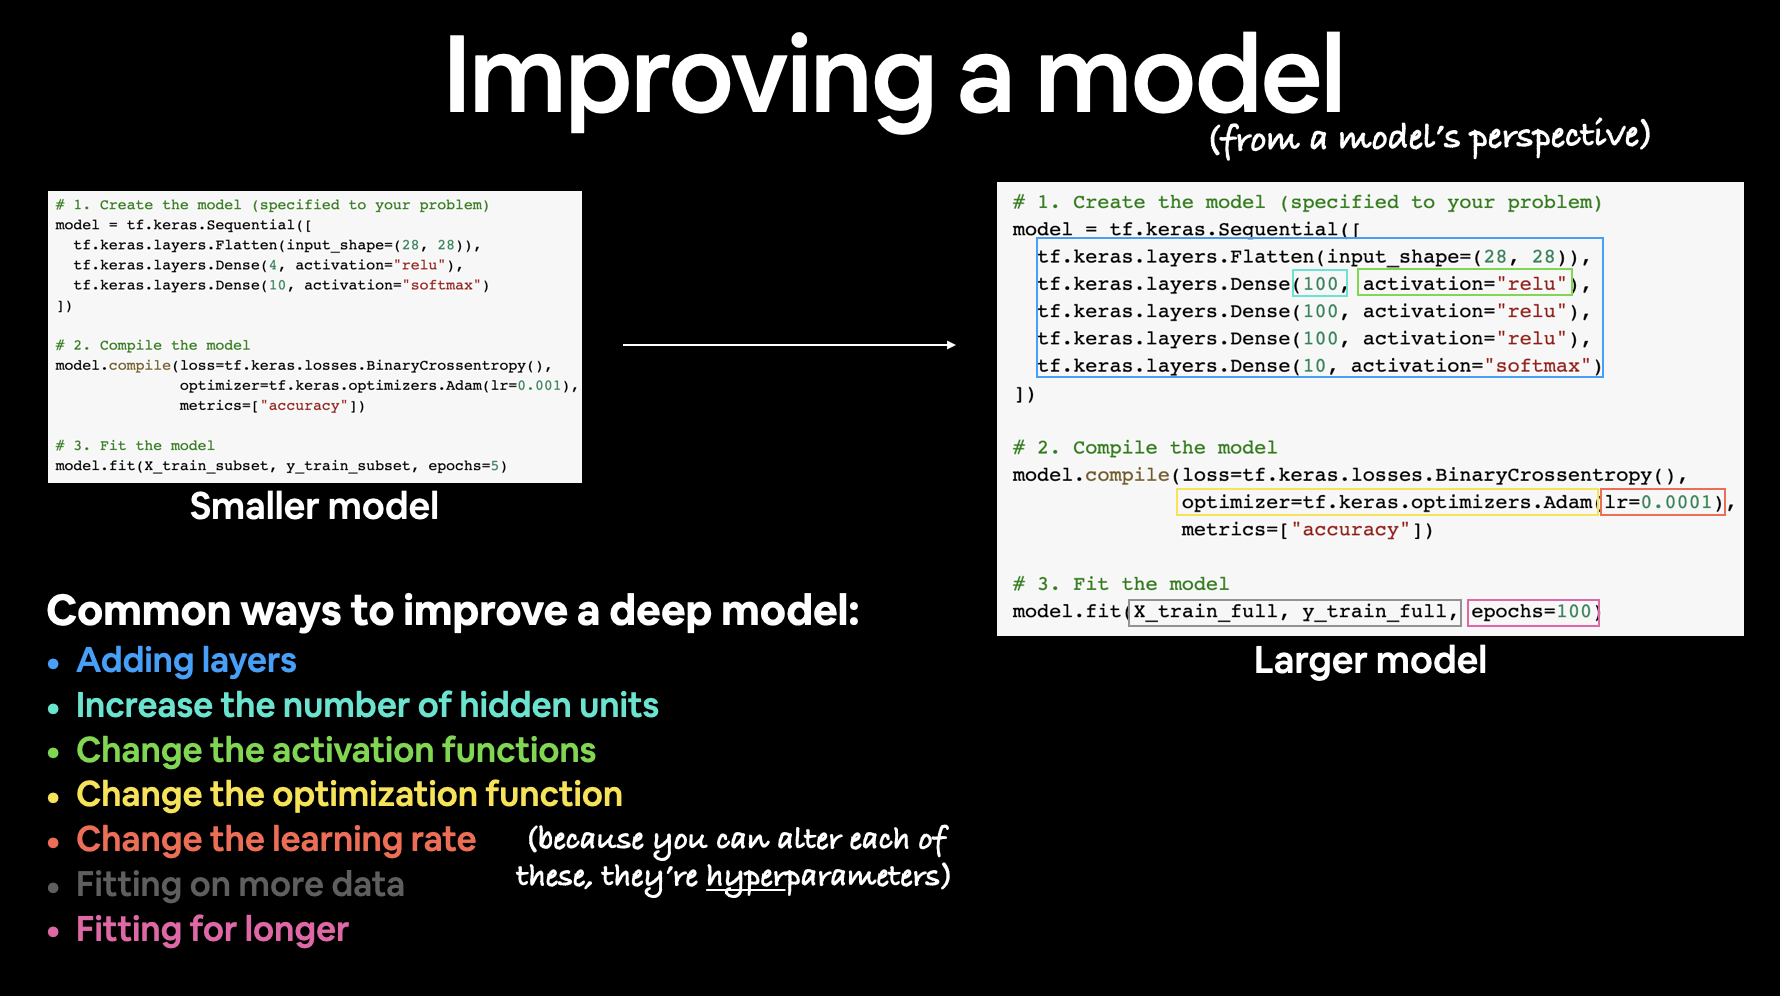

### Evaluating a model
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...

### Visualize, visualize, visualize

In [66]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
y = np.arange(-90, 110, 4)

In [67]:
len(X)

50

In [68]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

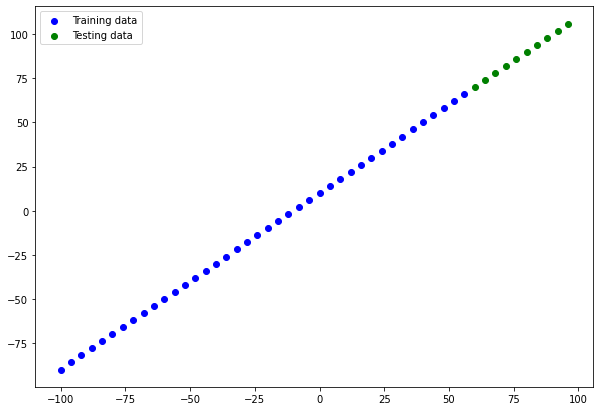

In [69]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [72]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=[1])) # define the input_shape to our model

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

In [73]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

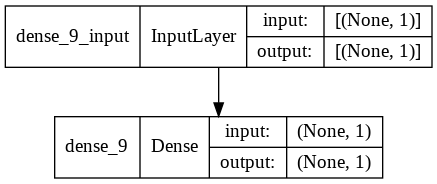

In [76]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [77]:
# Make predictions
y_preds = model.predict(X_test)

In [78]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

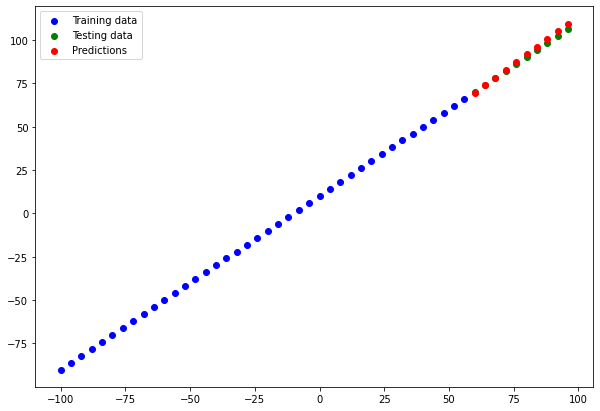

In [79]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [80]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 297ms/step - loss: 1.5351 - mae: 1.5351


[1.5350761413574219, 1.5350761413574219]

In [81]:
y_test.shape, y_preds.shape


((10,), (10, 1))

In [82]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.5350761>

In [84]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=1.5350761413574219>

In [83]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=3.5160816>

In [85]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

### Running experiments to improve a model


1.   Get more data - get more examples for your model to train on (more opportunities to learn patterns).
2.   Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3.   Train for longer - give your model more of a chance to find the patterns in the data.


Saving a model,Loading a model,Downloading a model (from Google Colab)

In [86]:
# Save a model using the SavedModel format
model.save('best_model_SavedModel_format')
!ls best_model_SavedModel_format

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets
assets	keras_metadata.pb  saved_model.pb  variables


In [87]:
# Save a model using the HDF5 format
model.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


In [88]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [89]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [91]:
# Compare model with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, y_preds.squeeze()).numpy()

True

In [92]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### a larger example

In [97]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [99]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [102]:
#one hot encoding (pandas get_dummies)
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values
X = insurance_one_hot.drop('charges',axis = 1)
y = insurance_one_hot['charges']


In [ ]:
# View features
X.head()

In [ ]:
# View y
y.head()

In [109]:
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train),len(X_test)

(1338, 1070, 268)

In [111]:
# Set random seed
tf.random.set_seed(42)

# built the model
insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(10))
insurance_model.add(tf.keras.layers.Dense(1))

# combine the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.optimizers.SGD(),
                        metrics = ["mae"])

# fit the model
insurance_model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [ ]:
insurance_model.summary()

In [113]:
# Check the results on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [114]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:
1.   Increasing the number of layers (2 -> 3).
2.   Increasing the number of units in each layer (except for the output layer).
3.   Changing the optimizer (from SGD to Adam).
Everything else will stay the same.

In [117]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [118]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

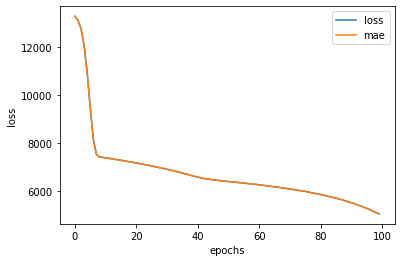

In [119]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.

In [120]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [121]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 4ms/step - loss: 3494.7285 - mae: 3494.7285


(3494.728515625, 3494.728515625)

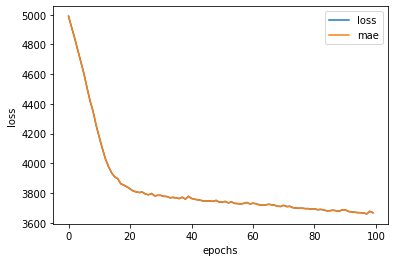

In [122]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

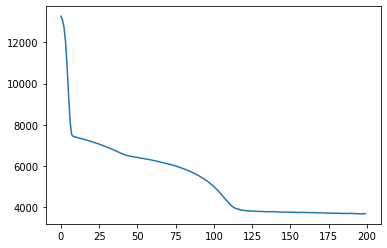

In [130]:
loss1 = pd.DataFrame(history.history)["loss"]
loss2 = pd.DataFrame(history_2.history)["loss"]
loss3 = np.concatenate((loss1, loss2), axis=None)
plt.plot(range(0,len(loss3)),loss3)


### Preprocessing data (normalization and standardization)
With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1(minMaxScaler)

In [ ]:
model = tf.keras.Sequential()
model.add

In [131]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [133]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [135]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [136]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [139]:
# build model to fit the normalized data

# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential()
insurance_model_3.add(tf.keras.layers.Dense(100))
insurance_model_3.add(tf.keras.layers.Dense(100))
insurance_model_3.add(tf.keras.layers.Dense(100))

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0) 

In [140]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3173.2141 - mae: 3173.2141


In [141]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3494.728515625, 3173.214111328125)